<a href="https://colab.research.google.com/github/archeopteryx-bit/cmcrepo/blob/main/cmc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Загрузка файла с тестовой выборкой SynTagRus

Получение файла с github.

In [1]:
!wget -m https://raw.githubusercontent.com/UniversalDependencies/UD_Russian-SynTagRus/master/ru_syntagrus-ud-test.conllu


--2024-03-05 13:53:47--  https://raw.githubusercontent.com/UniversalDependencies/UD_Russian-SynTagRus/master/ru_syntagrus-ud-test.conllu
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14970966 (14M) [text/plain]
Saving to: ‘raw.githubusercontent.com/UniversalDependencies/UD_Russian-SynTagRus/master/ru_syntagrus-ud-test.conllu’

raw.githubuserconte 100%[===================>]  14.28M  --.-KB/s    in 0.1s    

Last-modified header missing -- time-stamps turned off.
2024-03-05 13:53:48 (115 MB/s) - ‘raw.githubusercontent.com/UniversalDependencies/UD_Russian-SynTagRus/master/ru_syntagrus-ud-test.conllu’ saved [14970966/14970966]

FINISHED --2024-03-05 13:53:48--
Total wall clock time: 0.6s
Downloaded: 1 files, 14M in 0.1s (115 MB/s)


Перемещение в удобную директорию.

In [2]:
!mv /content/raw.githubusercontent.com/UniversalDependencies/UD_Russian-SynTagRus/master/ru_syntagrus-ud-test.conllu /content/ru_syntagrus-ud-test.conllu

Удаление директории, в которую изначально был скопирован файл.

In [3]:
!rm -r /content/raw.githubusercontent.com

# Классы для хранения информации о слове и предложении

Для хранения информации о слове (знаке препинания или тп).

In [4]:
class ConllEntry:
    def __init__(self, id, form, lemma, pos, cpos, feats=None, \
                 parent_id=None, relation=None,deps=None, misc=None):
        self.id = id
        self.form = form
        self.lemma = lemma
        self.pos = pos
        self.cpos = cpos
        self.feats = feats
        self.parent_id = parent_id
        self.relation = relation
        self.deps = deps
        self.misc = misc

Для хранения информации о предложении

In [5]:
class Sentence:
    def __init__(self):
        self.text = ""
        self.sent_id = ""
        self.words = []
        self.is_complex = False

    def add_word(self, word):
        self.words.append(word)

    def set_sent_id(self, sent_id):
        self.sent_id = sent_id

    def set_text(self, text):
        self.text = text

    def is_not_empty(self):
        return len(self.words) > 0

    def set_complex(self):
        self.is_complex = True

    def is_complex(self):
        return self.is_complex

# Чтение информации из файла

В SynTagRus есть предложения с пропуском слов. Их пока записываем в complex_sents и не рассматриваем (потом, возможно, обработаем их отдельно).

In [6]:
fh = open("/content/ru_syntagrus-ud-test.conllu",'r',encoding='utf-8')
sents_read = 0
sents = []
complex_sents = []
comments = set()

sent = Sentence()
for line in fh:
    tok = line.strip().split('\t')
    if not tok or line.strip() == '': # empty line, add sentence to list
        if sent.is_not_empty:
            sents_read += 1
            if sent.is_complex:
                complex_sents.append(sent)
            else:
                sents.append(sent)
        sent = Sentence()
    else:
        if line[0] == '#' or '-' in tok[0]: # a comment line
            line = line.strip()
            if line[:12] == "# sent_id = ":
                sent.set_sent_id(line[12:])
            elif line[:9] == "# text = ":
                sent.set_text(line[9:])
            else:
                comments.add(line)

        else: # an actual ConllEntry, add to tokens
            if tok[2] == "_":
                tok[2] = tok[1].lower()

            word = ConllEntry(*tok)
            sent.add_word(word)
            if "." in tok[0]:
                sent.set_complex()
fh.close()

In [7]:
len(complex_sents)

211

In [8]:
len(sents)

8589

# Работа с предложением

In [9]:
s = sents[0]

In [10]:
print(s.text)    # текст предложения

В советский период времени число ИТ- специалистов в Армении составляло около десяти тысяч.


In [11]:
print(s.sent_id) # id предложения в корпусе

2003Armeniya.xml_1


In [12]:
print(s.words) # список слов в предложении

[<__main__.ConllEntry object at 0x7d85c4164bb0>, <__main__.ConllEntry object at 0x7d85c4164be0>, <__main__.ConllEntry object at 0x7d85c4164c10>, <__main__.ConllEntry object at 0x7d85c4164b50>, <__main__.ConllEntry object at 0x7d85c4164ca0>, <__main__.ConllEntry object at 0x7d85c4164cd0>, <__main__.ConllEntry object at 0x7d85c4164d00>, <__main__.ConllEntry object at 0x7d85c4164d30>, <__main__.ConllEntry object at 0x7d85c4164d60>, <__main__.ConllEntry object at 0x7d85c4164d90>, <__main__.ConllEntry object at 0x7d85c4164dc0>, <__main__.ConllEntry object at 0x7d85c4164df0>, <__main__.ConllEntry object at 0x7d85c4164e20>, <__main__.ConllEntry object at 0x7d85c4164e50>, <__main__.ConllEntry object at 0x7d85c4164e80>]


In [13]:
len(s.words)   # в предложении 15 слов

15

# Получение информации о слове из предложения

In [14]:
# Чтобы получить в i-ом предложении j-ое слово используем sents[i].words[j]
# Например, в третьем предложении пятое слово (нумерация с 0)

x = sents[3].words[5]

In [15]:
print(x.id)        # id слова
print(x.form)      # слово
print(x.lemma)     # начальная форма слова
print(x.pos)       # часть речи
print(x.feats)     # морфологические характеристики
print(x.parent_id) # номер главного слова (для данного)
print(x.relation)  # тип связи с главным

6
сырья
сырье
NOUN
Animacy=Inan|Case=Gen|Gender=Neut|Number=Sing
4
obl


# pymorphy2

In [16]:
!pip install pymorphy2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 562.7 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=e0727edc23d74eb89229afdc9130e40f13acf3c5073185c185dc4fefffbd51e5
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built docopt


In [17]:
import pymorphy2

morph = pymorphy2.MorphAnalyzer()

parse_dict = dict()

for n_sent in range(1):
  print(sents[n_sent].sent_id)

  parse_dict[sents[n_sent].sent_id] = []

  for word in sents[n_sent].words:

    parse_dict[sents[n_sent].sent_id].append([word, morph.parse(word.form)])

    print(word.form)
    print(word.pos, word.feats)
    for tag in morph.parse(word.form):
      print('\t', tag.tag)
  print('-' * 50)

2003Armeniya.xml_1
В
ADP _
	 PREP
	 NOUN,inan,masc,Fixd,Abbr sing,gent
	 NOUN,inan,masc,Fixd,Abbr sing,loct
	 NOUN,inan,masc,Fixd,Abbr sing,nomn
	 NOUN,inan,masc,Fixd,Abbr sing,datv
	 NOUN,inan,masc,Fixd,Abbr sing,accs
	 NOUN,inan,masc,Fixd,Abbr sing,ablt
	 NOUN,inan,masc,Fixd,Abbr plur,nomn
	 NOUN,inan,masc,Fixd,Abbr plur,gent
	 NOUN,inan,masc,Fixd,Abbr plur,datv
	 NOUN,inan,masc,Fixd,Abbr plur,accs
	 NOUN,inan,masc,Fixd,Abbr plur,ablt
	 NOUN,inan,masc,Fixd,Abbr plur,loct
	 NOUN,anim,masc,Sgtm,Name,Fixd,Abbr,Init sing,nomn
	 NOUN,anim,masc,Sgtm,Name,Fixd,Abbr,Init sing,gent
	 NOUN,anim,masc,Sgtm,Name,Fixd,Abbr,Init sing,datv
	 NOUN,anim,masc,Sgtm,Name,Fixd,Abbr,Init sing,accs
	 NOUN,anim,masc,Sgtm,Name,Fixd,Abbr,Init sing,ablt
	 NOUN,anim,masc,Sgtm,Name,Fixd,Abbr,Init sing,loct
	 NOUN,anim,femn,Sgtm,Name,Fixd,Abbr,Init sing,nomn
	 NOUN,anim,femn,Sgtm,Name,Fixd,Abbr,Init sing,gent
	 NOUN,anim,femn,Sgtm,Name,Fixd,Abbr,Init sing,datv
	 NOUN,anim,femn,Sgtm,Name,Fixd,Abbr,Init sing,accs
	 

In [18]:
for i in parse_dict:
  for j in parse_dict[i]:
    print(j[0].form)
    for k in j[1]:
      print('\t', k)
  print()

В
	 Parse(word='в', tag=OpencorporaTag('PREP'), normal_form='в', score=0.999327, methods_stack=((DictionaryAnalyzer(), 'в', 393, 0),))
	 Parse(word='в', tag=OpencorporaTag('NOUN,inan,masc,Fixd,Abbr sing,gent'), normal_form='в', score=0.000249, methods_stack=((DictionaryAnalyzer(), 'в', 349, 1),))
	 Parse(word='в', tag=OpencorporaTag('NOUN,inan,masc,Fixd,Abbr sing,loct'), normal_form='в', score=5.7e-05, methods_stack=((DictionaryAnalyzer(), 'в', 349, 5),))
	 Parse(word='в', tag=OpencorporaTag('NOUN,inan,masc,Fixd,Abbr sing,nomn'), normal_form='в', score=1.9e-05, methods_stack=((DictionaryAnalyzer(), 'в', 349, 0),))
	 Parse(word='в', tag=OpencorporaTag('NOUN,inan,masc,Fixd,Abbr sing,datv'), normal_form='в', score=1.9e-05, methods_stack=((DictionaryAnalyzer(), 'в', 349, 2),))
	 Parse(word='в', tag=OpencorporaTag('NOUN,inan,masc,Fixd,Abbr sing,accs'), normal_form='в', score=1.9e-05, methods_stack=((DictionaryAnalyzer(), 'в', 349, 3),))
	 Parse(word='в', tag=OpencorporaTag('NOUN,inan,masc,F

Количество разборов pymorphy2 для слов.
(кол-во разб. - кол-во слов)

In [19]:
parse_counts_all = dict()
parse_counts_unique = dict()

for n_sent in range(len(sents)):
  for word in sents[n_sent].words:
    count = len(morph.parse(word.form))
    if count not in parse_counts_all.keys():
      parse_counts_all[count] = 1
      parse_counts_unique[count] = [word.form]
    else:
      parse_counts_all[count] += 1
      if word.form not in parse_counts_unique[count]:
        parse_counts_unique[count].append(word.form)

for n_sent in range(len(complex_sents)):
  for word in complex_sents[n_sent].words:
    count = len(morph.parse(word.form))
    if count not in parse_counts_all.keys():
      parse_counts_all[count] = 1
      parse_counts_unique[count] = [word.form]
    else:
      parse_counts_all[count] += 1
      if word.form not in parse_counts_unique[count]:
        parse_counts_unique[count].append(word.form)

for key in parse_counts_all:
  print(key, parse_counts_all[key], '/', len(parse_counts_unique[key]))
  print('\t', end='')
  print(*parse_counts_unique[key], sep=', ')

37 612 / 2
	В, соло
2 27868 / 9245
	советский, период, число, специалистов, около, Доставшийся, наследство, промышленный, интеллектуальный, потенциал, кадры, резко, где, добывающие, поставке, для, сбыта, постсоветском, быстро, темпы, Помощь, стране, обычно, регулярно, значительные, последнее, место, XIX, находилась, росло, жителей, проживало, человек, промышленные, было, строительство, Ереван, Александрополь, Ленинакан, современное, наименование, же, детей, программе, развитие, Лунный, солнечный, календари, предков, первый, пятый, замечательные, системные, научные, дорога, изношенность, необходимость, отрасль, благодаря, важные, сотрудничество, ресурс, Архитекторов, институт, вышли, печатные, армянском, языке, Индия, Аздарар, Калькутте, журнал, еженедельник, Восточные, президента, выходит, русском, языках, выходят, Голос, время, экспресс, Дайджест, начал, ереванский, телецентр, Национальный, комитет, спутниковому, республике, канал, абонентов, столице, своем, кабельные, специализирующи

# Графики

Гистограммы с подписями (неудачный вариант)

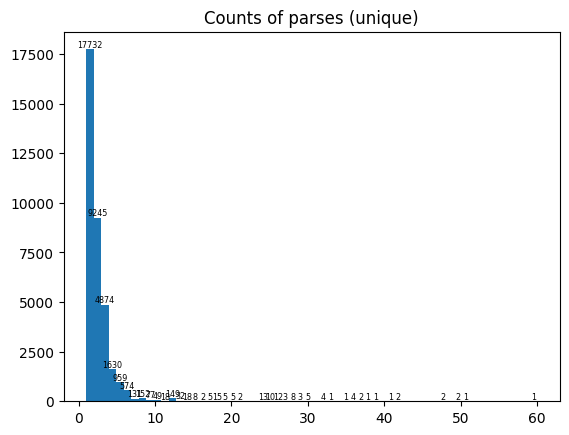

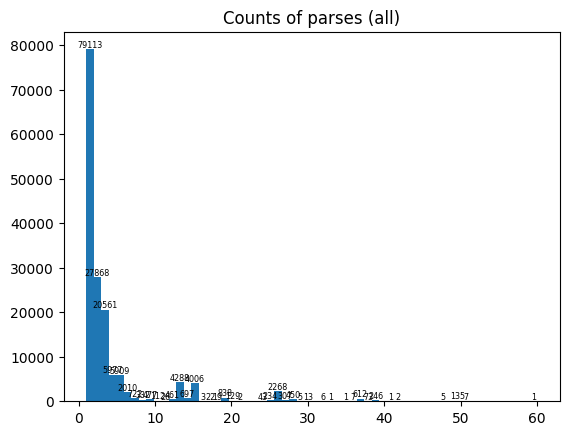

In [20]:
import matplotlib.pyplot as plt

unique_parse_list = []
mx = 0

labels_for_hist_unique = [0] * max(parse_counts_unique.keys())

for key in parse_counts_unique:
  unique_parse_list += [key] * len(parse_counts_unique[key])
  labels_for_hist_unique[key - 1] = len(parse_counts_unique[key])
  mx = max(mx, key)

#  plt.hist(unique_parse_list, bins=mx)
#  plt.title('Counts of parses (unique)')
fig, ax = plt.subplots(1, 1)
ax.hist(unique_parse_list, bins=mx)
ax.set_title('Counts of parses (unique)')
rects = ax.patches
for rect, label in zip(rects, labels_for_hist_unique):
  height = rect.get_height()
  if label != 0:
    ax.text(rect.get_x() + rect.get_width() / 2,
            height + 0.01,
            label, size='xx-small', ha='center', va='bottom')
plt.show()

all_parse_list = []
labels_for_hist_all = [0] * max(parse_counts_unique.keys())

for key in parse_counts_all:
  labels_for_hist_all[key - 1] = parse_counts_all[key]
  all_parse_list += [key] * parse_counts_all[key]


fig, ax = plt.subplots(1, 1)
ax.hist(all_parse_list, bins=mx)
ax.set_title('Counts of parses (all)')
rects = ax.patches
for rect, label in zip(rects, labels_for_hist_all):
  height = rect.get_height()
  if label != 0:
    ax.text(rect.get_x() + rect.get_width() / 2,
            height + 0.01,
            label, size='xx-small', ha='center', va='bottom')
plt.show()

Диаграммы с цифрами (более удачный вариант)

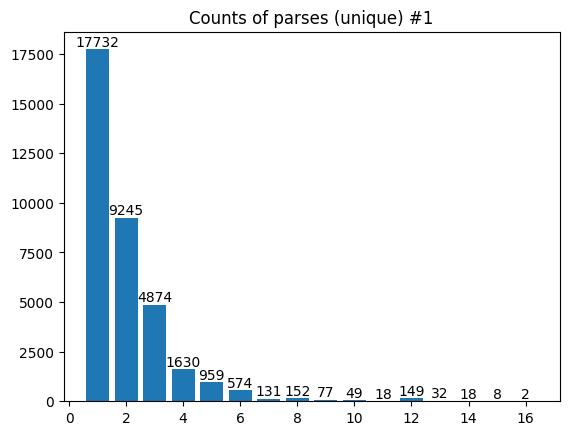

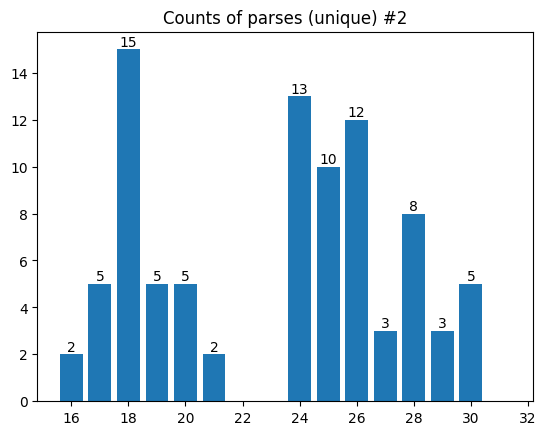

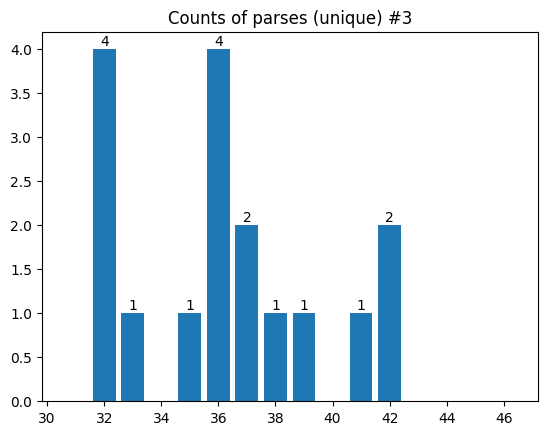

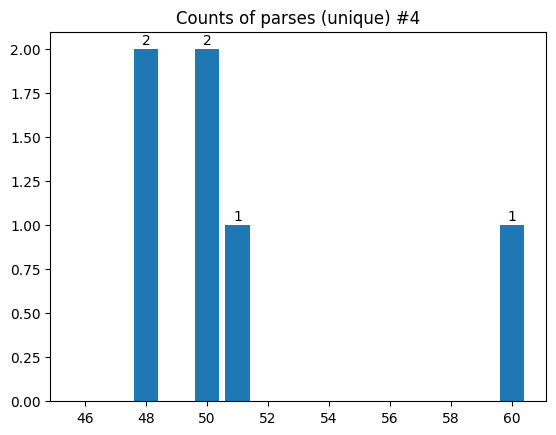

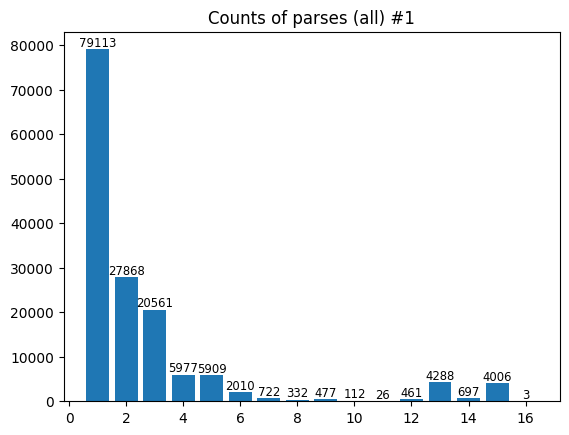

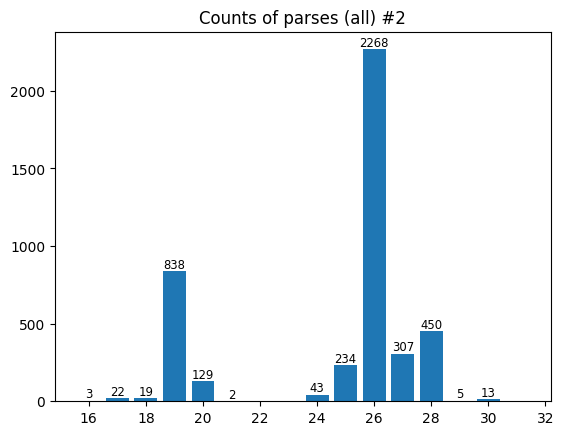

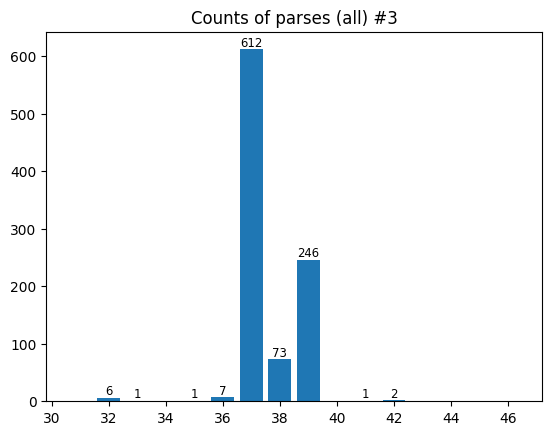

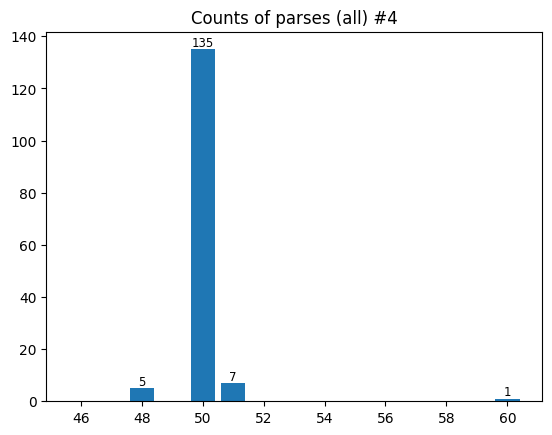

In [21]:
unique_counts = [0] * max(parse_counts_unique.keys())
parse_counts = [i for i in range(1, 61)]

for key in parse_counts_unique:
  unique_counts[key - 1] = len(parse_counts_unique[key])

# крайне костыльный вариант
for i in [16, 31, 46, 61]:
  fig, ax = plt.subplots(1, 1)
  ax.bar(parse_counts[i-16:i], unique_counts[i-16:i])
  ax.set_title(f'Counts of parses (unique) #{i // 15}')
  rects = ax.patches
  for rect, label in zip(rects, labels_for_hist_unique[i-16:i]):
    height = rect.get_height()
    if label != 0:
      ax.text(rect.get_x() + rect.get_width() / 2, height + 0.01,
            label, ha='center', va='bottom')
  plt.show()



all_counts = [0] * max(parse_counts_all.keys())

for key in parse_counts_all:
  all_counts[key - 1] = parse_counts_all[key]

for i in [16, 31, 46, 61]:
  fig, ax = plt.subplots(1, 1)
  ax.bar(parse_counts[i-16:i], all_counts[i-16:i])
  ax.set_title(f'Counts of parses (all) #{i // 15}')
  rects = ax.patches
  for rect, label in zip(rects, labels_for_hist_all[i-16:i]):
    height = rect.get_height()
    if label != 0:
      ax.text(rect.get_x() + rect.get_width() / 2, height + 0.01,
            label, size='small', ha='center', va='bottom')
  plt.show()

# Сопоставление меток SynTagRus -> pymorphy2

In [22]:
marks = {
    # POS / ?? PRED, COMP ??
    "ADJ": ["ADJF", "ADJS"],
    "ADP": [],
    "ADV": ["ADVB"],
    "AUX": [],
    "CCONJ": ["CONJ"],
    "DET": [],
    "INTJ": ["INTJ"],
    "NOUN": ["NOUN"],
    "NUM": ["NUMR"],
    "PART": ["PRCL"],
    "PRON": ["NPRO"],
    "PROPN": ["NOUN"],
    "PUNCT": [], # "PNCT"
    "SCONJ": [],
    "SYM": [], # "PNCT"
    "VERB": ["VERB", "INFN", "PRTF", "PRTS", "GRND"],
    "X": [],

    # Animacy
    "Anim": ["anim"],
    "Inan": ["inan"],

    # Mood
    "Cnd": [],
    "Imp": ["impr"],
    "Ind": ["indc"],

    # Aspect
    "Imp": ["impf"],
    "Perf": ["perf"],

    # Tense
    "Fut": ["futr"],
    "Past": ["past"],
    "Pres": ["pres"],

    # Gender / ?? ms-f ??
    "Fem": ["femn"],
    "Masc": ["masc"],
    "Neut": ["neut"],  # +"ms-f" ?????

    # Voice
    "Act": ["actv"],
    "Mid": [],
    "Pass": ["pssv"],

    # Person
    "1": ["1per"],
    "2": ["2per"],
    "3": ["3per"],

    # Number
    "Plur": ["plur"],
    "Sing": ["sing"],

    # Case / ?? gen1, gen2, acc1, loc1, loc2 ??
    "Acc": ["accs"],
    "Dat": ["datv"],
    "Gen": ["gent"],
    "Ins": [],
    "Loc": ["loct"],
    "Nom": ["nomn"],
    "Par": [],
    "Voc": ["voct"],

    # TRns / ?? tran, intr ??
    # INvl / ?? incl, excl ??
}

Только sents, complex_sents - ниже, тот же самый код

In [23]:
compared_parses = dict()

for n_sent in range(len(sents)):
  for word in sents[n_sent].words:
    count = 0
    py_parse = morph.parse(word.form)
    smlr_parse = []
    if word.pos == "ADJ":
      for parse in py_parse:
        if parse.tag.POS in ["ADJF", "ADJS", "COMP"]:
          smlr_parse.append(parse)
    elif word.pos == "ADP":
      for parse in py_parse:
        if parse.tag.POS in ["PREP"]:
          smlr_parse.append(parse)
    elif word.pos == "ADV":
      for parse in py_parse:
        if parse.tag.POS in ["ADVB"]:
          smlr_parse.append(parse)
    elif word.pos == "AUX":  # ???
      for parse in py_parse:
        if parse.tag.POS in ["VERB"]:
          smlr_parse.append(parse)
    elif word.pos == "CCONJ":
      for parse in py_parse:
        if parse.tag.POS in ["CONJ"]:
          smlr_parse.append(parse)
    elif word.pos == "DET":
      for parse in py_parse:
        if parse.tag.POS in ["NPRO"]:
          smlr_parse.append(parse)
    elif word.pos == "INTJ":
      for parse in py_parse:
        if parse.tag.POS in ["INTJ"]:
          smlr_parse.append(parse)
    elif word.pos == "NOUN":
      for parse in py_parse:
        if parse.tag.POS in ["NOUN"]:
          smlr_parse.append(parse)
    elif word.pos == "NUM":
      for parse in py_parse:
        if parse.tag.POS in ["NUMR"]:
          smlr_parse.append(parse)
        elif "NUMB" in parse.tag:
          smlr_parse.append(parse)
    elif word.pos == "PART":
      for parse in py_parse:
        if parse.tag.POS in ["PRCL"]:
          smlr_parse.append(parse)
    elif word.pos == "PRON":
      for parse in py_parse:
        if parse.tag.POS in ["NPRO"]:
          smlr_parse.append(parse)
    elif word.pos == "PROPN":
      for parse in py_parse:
        if parse.tag.POS in ["NOUN"]:
          smlr_parse.append(parse)
    elif word.pos == "PUNCT":
      for parse in py_parse:
        if "PNCT" in parse.tag:
          smlr_parse.append(parse)
    elif word.pos == "SCONJ":
      for parse in py_parse:
        if parse.tag.POS in ["CONJ"]:
          smlr_parse.append(parse)
    elif word.pos == "SYM":
      for parse in py_parse:
        if ("PNCT" in parse.tag) or ("UNKN" in parse.tag):
          smlr_parse.append(parse)
    elif word.pos == "VERB":
      for parse in py_parse:
        if parse.tag.POS in ["VERB", "INFN", "PRTF", "PRTS", "GRND"]:
          smlr_parse.append(parse)
    elif word.pos == "X":
      for parse in py_parse:
        if parse.tag.POS in ["NOUN"]:
          smlr_parse.append(parse)
        elif ("LATN" in parse.tag) or ("UNKN" in parse.tag):
          smlr_parse.append(parse)

    feats = []

    if word.feats != '_':
      feats = [i.split('=')[0] for i in word.feats.split('|')]
      values = [i.split('=')[1] for i in word.feats.split('|')]

    same = [True]

    #  Тк, если не совпал ни один из вариантов части речи
    if not smlr_parse:
      if sents[n_sent].sent_id not in compared_parses:
        compared_parses[sents[n_sent].sent_id] = dict()
        compared_parses[sents[n_sent].sent_id][word.form] = [False]
        break
      else:
        compared_parses[sents[n_sent].sent_id][word.form] = [False]
        break

    for parse in smlr_parse:
      if 'Animacy' in feats:
        py_anim = parse.tag.animacy
        str_anim = values[feats.index('Animacy')]
        if (((py_anim == 'anim') and (str_anim == 'Anim')) or
           ((py_anim == 'inan') and (str_anim == 'Inan'))):
           same.append(True)
        else:
          same.append(False)
      if 'Aspect' in feats:
        py_asp = parse.tag.aspect
        str_asp = values[feats.index('Aspect')]
        if (((py_asp == 'perf') and (str_asp == 'Perf')) or
           ((py_asp == 'impf') and (str_asp == 'Imp'))):
          same.append(True)
        else:
          same.append(False)
      if 'Case' in feats:
        py_case = parse.tag.case
        str_case = values[feats.index('Case')]
        if (((py_case == 'nomn') and (str_case == 'Nom')) or
           ((py_case == 'gent') and (str_case == 'Gen')) or
           ((py_case == 'datv') and (str_case == 'Dat')) or
           ((py_case == 'accs') and (str_case == 'Acc')) or
           ((py_case == 'ablt') and (str_case == 'Ins')) or
           ((py_case == 'loct') and (str_case == 'Loc')) or
           ((py_case == 'voct') and (str_case == 'Voc'))):
          same.append(True)
        elif ((str_case == "Par") or
             (py_case == "gen1") or
             (py_case == "gen2") or
             (py_case == "acc2") or
             (py_case == "loc1") or
             (py_case == "loc2")):  # ??????
          pass
        else:
          same.append(False)
      if 'Gender' in feats:
        py_gend = parse.tag.gender
        str_gend = values[feats.index('Gender')]
        if (((py_gend == 'masc') and (str_gend == 'Masc')) or
           ((py_gend == 'femn') and (str_gend == 'Fem')) or
           ((py_gend == 'neut') and (str_gend == 'Neut'))):
          same.append(True)
        #elif py_gend == "ms-f":  # ??????
        else:
          same.append(False)
      if 'Mood' in feats:
        py_mood = parse.tag.mood
        str_mood = values[feats.index('Mood')]
        if (((py_mood == 'indc') and (str_mood == 'Ind')) or
           ((py_mood == 'impr') and (str_mood == 'Imp'))):
          same.append(True)
        elif str_voic == "Cnd":  # ??????
          pass
        else:
          same.append(False)
      if 'Number' in feats:
        py_numb = parse.tag.number
        str_numb = values[feats.index('Number')]
        if (((py_numb == 'sing') and (str_numb == 'Sing')) or
           ((py_numb == 'plur') and (str_numb == 'Plur'))):
          same.append(True)
        else:
          same.append(False)
      if 'Person' in feats:
        py_pers = parse.tag.person
        str_pers = values[feats.index('Person')]
        if (((py_pers == '1per') and (str_pers == '1')) or
           ((py_pers == '2per') and (str_pers == '2')) or
           ((py_pers == '3per') and (str_pers == '3'))):
          same.append(True)
        else:
          same.append(False)
      if 'Tense' in feats:
        py_tens = parse.tag.tense
        str_tens = values[feats.index('Tense')]
        if (((py_tens == 'pres') and (str_tens == 'Pres')) or
           ((py_tens == 'past') and (str_tens == 'Past')) or
           ((py_tens == 'futr') and (str_tens == 'Fut'))):
          same.append(True)
        else:
          same.append(False)
      if 'Voice' in feats:
        py_voic = parse.tag.voice
        str_voic = values[feats.index('Voice')]
        if (((py_voic == 'actv') and (str_voic == 'Act')) or
           ((py_voic == 'pssv') and (str_voic == 'Pass'))):
          same.append(True)
        elif str_voic == "Mid":  # ??????
          pass
        else:
          same.append(False)

      if sents[n_sent].sent_id not in compared_parses:
        compared_parses[sents[n_sent].sent_id] = dict()
        compared_parses[sents[n_sent].sent_id][word.form] = [all(same)]
        if all(same):
          compared_parses[sents[n_sent].sent_id][word.form] += [parse.tag]
      else:
        if word.form not in compared_parses[sents[n_sent].sent_id]:
          compared_parses[sents[n_sent].sent_id][word.form] = [all(same)]
          if all(same):
            compared_parses[sents[n_sent].sent_id][word.form] += [parse.tag]
        else:
          if all(same):
            compared_parses[sents[n_sent].sent_id][word.form] += [parse.tag]

Тот же самый код для complex_sents

In [24]:
for n_sent in range(len(complex_sents)):

  for word in complex_sents[n_sent].words:
    py_parse = morph.parse(word.form)
    smlr_parse = []
    if word.pos == "ADJ":
      for parse in py_parse:
        if parse.tag.POS in ["ADJF", "ADJS", "COMP"]:
          smlr_parse.append(parse)
    elif word.pos == "ADP":
      for parse in py_parse:
        if parse.tag.POS in ["PREP"]:
          smlr_parse.append(parse)
    elif word.pos == "ADV":
      for parse in py_parse:
        if parse.tag.POS in ["ADVB"]:
          smlr_parse.append(parse)
    elif word.pos == "AUX":  # ???
      for parse in py_parse:
        if parse.tag.POS in ["VERB"]:
          smlr_parse.append(parse)
    elif word.pos == "CCONJ":
      for parse in py_parse:
        if parse.tag.POS in ["CONJ"]:
          smlr_parse.append(parse)
    elif word.pos == "DET":
      for parse in py_parse:
        if parse.tag.POS in ["NPRO"]:
          smlr_parse.append(parse)
    elif word.pos == "INTJ":
      for parse in py_parse:
        if parse.tag.POS in ["INTJ"]:
          smlr_parse.append(parse)
    elif word.pos == "NOUN":
      for parse in py_parse:
        if parse.tag.POS in ["NOUN"]:
          smlr_parse.append(parse)
    elif word.pos == "NUM":
      for parse in py_parse:
        if parse.tag.POS in ["NUMR"]:
          smlr_parse.append(parse)
        elif "NUMB" in parse.tag:
          smlr_parse.append(parse)
    elif word.pos == "PART":
      for parse in py_parse:
        if parse.tag.POS in ["PRCL"]:
          smlr_parse.append(parse)
    elif word.pos == "PRON":
      for parse in py_parse:
        if parse.tag.POS in ["NPRO"]:
          smlr_parse.append(parse)
    elif word.pos == "PROPN":
      for parse in py_parse:
        if parse.tag.POS in ["NOUN"]:
          smlr_parse.append(parse)
    elif word.pos == "PUNCT":
      for parse in py_parse:
        if "PNCT" in parse.tag:
          smlr_parse.append(parse)
    elif word.pos == "SCONJ":
      for parse in py_parse:
        if parse.tag.POS in ["CONJ"]:
          smlr_parse.append(parse)
    elif word.pos == "SYM":
      for parse in py_parse:
        if ("PNCT" in parse.tag) or ("UNKN" in parse.tag):
          smlr_parse.append(parse)
    elif word.pos == "VERB":
      for parse in py_parse:
        if parse.tag.POS in ["VERB", "INFN", "PRTF", "PRTS", "GRND"]:
          smlr_parse.append(parse)
    elif word.pos == "X":
      for parse in py_parse:
        if parse.tag.POS in ["NOUN"]:
          smlr_parse.append(parse)
        elif ("LATN" in parse.tag) or ("UNKN" in parse.tag):
          smlr_parse.append(parse)

    feats = []

    if word.feats != '_':
      feats = [i.split('=')[0] for i in word.feats.split('|')]
      values = [i.split('=')[1] for i in word.feats.split('|')]

    same = []

    #  Тк, если не совпал ни один из вариантов части речи
    if not smlr_parse:
      if complex_sents[n_sent].sent_id not in compared_parses:
        compared_parses[complex_sents[n_sent].sent_id] = dict()
        compared_parses[complex_sents[n_sent].sent_id][word.form] = [False]
        break
      else:
        compared_parses[complex_sents[n_sent].sent_id][word.form] = [False]
        break

    for parse in smlr_parse:
      if 'Animacy' in feats:
        py_anim = parse.tag.animacy
        str_anim = values[feats.index('Animacy')]
        if (((py_anim == 'anim') and (str_anim == 'Anim')) or
           ((py_anim == 'inan') and (str_anim == 'Inan'))):
           same.append(True)
        else:
          same.append(False)
      if 'Aspect' in feats:
        py_asp = parse.tag.aspect
        str_asp = values[feats.index('Aspect')]
        if (((py_asp == 'perf') and (str_asp == 'Perf')) or
           ((py_asp == 'impf') and (str_asp == 'Imp'))):
          same.append(True)
        else:
          same.append(False)
      if 'Case' in feats:
        py_case = parse.tag.case
        str_case = values[feats.index('Case')]
        if (((py_case == 'nomn') and (str_case == 'Nom')) or
           ((py_case == 'gent') and (str_case == 'Gen')) or
           ((py_case == 'datv') and (str_case == 'Dat')) or
           ((py_case == 'accs') and (str_case == 'Acc')) or
           ((py_case == 'ablt') and (str_case == 'Ins')) or
           ((py_case == 'loct') and (str_case == 'Loc')) or
           ((py_case == 'voct') and (str_case == 'Voc'))):
          same.append(True)
        elif ((str_case == "Par") or
             (py_case == "gen1") or
             (py_case == "gen2") or
             (py_case == "acc2") or
             (py_case == "loc1") or
             (py_case == "loc2")):  # ??????
          pass
        else:
          same.append(False)
      if 'Gender' in feats:
        py_gend = parse.tag.gender
        str_gend = values[feats.index('Gender')]
        if (((py_gend == 'masc') and (str_gend == 'Masc')) or
           ((py_gend == 'femn') and (str_gend == 'Fem')) or
           ((py_gend == 'neut') and (str_gend == 'Neut'))):
          same.append(True)
        #elif py_gend == "ms-f":  # ??????
        else:
          same.append(False)
      if 'Mood' in feats:
        py_mood = parse.tag.mood
        str_mood = values[feats.index('Mood')]
        if (((py_mood == 'indc') and (str_mood == 'Ind')) or
           ((py_mood == 'impr') and (str_mood == 'Imp'))):
          same.append(True)
        elif str_voic == "Cnd":  # ??????
          pass
        else:
          same.append(False)
      if 'Number' in feats:
        py_numb = parse.tag.number
        str_numb = values[feats.index('Number')]
        if (((py_numb == 'sing') and (str_numb == 'Sing')) or
           ((py_numb == 'plur') and (str_numb == 'Plur'))):
          same.append(True)
        else:
          same.append(False)
      if 'Person' in feats:
        py_pers = parse.tag.person
        str_pers = values[feats.index('Person')]
        if (((py_pers == '1per') and (str_pers == '1')) or
           ((py_pers == '2per') and (str_pers == '2')) or
           ((py_pers == '3per') and (str_pers == '3'))):
          same.append(True)
        else:
          same.append(False)
      if 'Tense' in feats:
        py_tens = parse.tag.tense
        str_tens = values[feats.index('Tense')]
        if (((py_tens == 'pres') and (str_tens == 'Pres')) or
           ((py_tens == 'past') and (str_tens == 'Past')) or
           ((py_tens == 'futr') and (str_tens == 'Fut'))):
          same.append(True)
        else:
          same.append(False)
      if 'Voice' in feats:
        py_voic = parse.tag.voice
        str_voic = values[feats.index('Voice')]
        if (((py_voic == 'actv') and (str_voic == 'Act')) or
           ((py_voic == 'pssv') and (str_voic == 'Pass'))):
          same.append(True)
        elif str_voic == "Mid":  # ??????
          pass
        else:
          same.append(False)

      if complex_sents[n_sent].sent_id not in compared_parses:
        compared_parses[complex_sents[n_sent].sent_id] = dict()
        compared_parses[complex_sents[n_sent].sent_id][word.form] = [all(same)]
        if all(same):
          compared_parses[complex_sents[n_sent].sent_id][word.form] += [parse.tag]
      else:
        if word.form not in compared_parses[complex_sents[n_sent].sent_id]:
          compared_parses[complex_sents[n_sent].sent_id][word.form] = [all(same)]
          if all(same):
            compared_parses[complex_sents[n_sent].sent_id][word.form] += [parse.tag]
        else:
          if all(same):
            compared_parses[complex_sents[n_sent].sent_id][word.form] += [parse.tag]

Словарь с предложениями, со словами и есть ли совпадающие разборы. Если есть разбор - он также есть в словаре.

In [25]:
for n_sent in range(80):
  print('предложение', sents[n_sent].sent_id)
  for i in compared_parses[sents[n_sent].sent_id]:
    print('\t', i)
    print('\t' * 2, compared_parses[sents[n_sent].sent_id][i])
  print('-' * 75)

предложение 2003Armeniya.xml_1
	 В
		 [True, OpencorporaTag('PREP')]
	 советский
		 [False]
	 период
		 [True, OpencorporaTag('NOUN,inan,masc sing,accs')]
	 времени
		 [True, OpencorporaTag('NOUN,inan,neut sing,gent')]
	 число
		 [False]
	 ИТ
		 [False]
	 -
		 [True, OpencorporaTag('PNCT')]
	 специалистов
		 [True, OpencorporaTag('NOUN,anim,masc plur,gent')]
	 в
		 [True, OpencorporaTag('PREP')]
	 Армении
		 [False]
	 составляло
		 [False]
	 около
		 [True, OpencorporaTag('PREP')]
	 десяти
		 [True, OpencorporaTag('NUMR gent')]
	 тысяч
		 [True, OpencorporaTag('NOUN,inan,femn plur,gent')]
	 .
		 [True, OpencorporaTag('PNCT')]
---------------------------------------------------------------------------
предложение 2003Armeniya.xml_2
	 Доставшийся
		 [True, OpencorporaTag('PRTF,perf,intr,past,actv masc,sing,nomn')]
	 в
		 [True, OpencorporaTag('PREP')]
	 наследство
		 [True, OpencorporaTag('NOUN,inan,neut sing,accs')]
	 от
		 [True, OpencorporaTag('PREP')]
	 советского
		 [False]
	 период

Количество слов, у которых есть подходящие разборы

In [26]:
count_has_parse = 0
count_parse = 0

for sent_key in compared_parses:
  for word_key in compared_parses[sent_key]:
    if compared_parses[sent_key][word_key][0]:
      count_has_parse += 1
    count_parse += 1

print('count of "has right parse":', count_has_parse)
print((count_has_parse / count_parse) * 100, '% has "right parse"')

count of "has right parse": 58060
74.02024528927306 % has "right parse"


# Хороший вариант кода?

In [27]:
def check_stand_pos(py_parses, word_str_pos, str_pos, py_pos_list, smlr_parse):
  if word_str_pos == str_pos:
    for parse in py_parses:
      if parse.tag.POS in py_pos_list:
        smlr_parse.append(parse)
  return

def check_not_stand_pos(py_parses, word_str_pos, str_pos, py_ns_pos_list, smlr_parse):
  if word_str_pos == str_pos:
    for parse in py_parse:
      for pos in py_ns_pos_list:
        if pos in parse.tag:
          smlr_parse.append(parse)
  return

def check_pos(word):
  py_parse = morph.parse(word.form)
  smlr_parse = []
  check_stand_pos(py_parse, word.pos, "ADJ", ["ADJF", "ADJS", "COMP"], smlr_parse)
  check_stand_pos(py_parse, word.pos, "ADP", ["PREP"], smlr_parse)
  check_stand_pos(py_parse, word.pos, "ADV", ["ADVB"], smlr_parse)
  check_stand_pos(py_parse, word.pos, "AUX", ["VERB"], smlr_parse)
  check_stand_pos(py_parse, word.pos, "CCONJ", ["CONJ"], smlr_parse)
  check_stand_pos(py_parse, word.pos, "DET", ["NPRO"], smlr_parse)
  check_stand_pos(py_parse, word.pos, "INTJ", ["INTJ"], smlr_parse)
  check_stand_pos(py_parse, word.pos, "NOUN", ["NOUN"], smlr_parse)
  check_stand_pos(py_parse, word.pos, "NUM", ["NUMR"], smlr_parse)
  check_not_stand_pos(py_parse, word.pos, "NUM", ["NUMB"], smlr_parse)  # Not standart gram NUMB
  check_stand_pos(py_parse, word.pos, "PART", ["PRCL"], smlr_parse)
  check_stand_pos(py_parse, word.pos, "PRON", ["NPRO"], smlr_parse)
  check_stand_pos(py_parse, word.pos, "PROPN", ["NOUN"], smlr_parse)
  check_not_stand_pos(py_parse, word.pos, "PUNCT", ["PNCT"], smlr_parse)  # Not standart gram PNCT
  check_stand_pos(py_parse, word.pos, "SCONJ", ["CONJ"], smlr_parse)
  check_not_stand_pos(py_parse, word.pos, "SYM", ["PNCT", "UNKN"], smlr_parse)  # Not standart grams for SYM
  check_stand_pos(py_parse, word.pos, "VERB", ["VERB", "INFN", "PRTF", "PRTS", "GRND"], smlr_parse)
  check_stand_pos(py_parse, word.pos, "X", ["NOUN"], smlr_parse)
  check_not_stand_pos(py_parse, word.pos, "x", ["LATN", "UNKN", "ROMN"], smlr_parse)  # Not standart grams for X
  if not smlr_parse:
    smlr_parse.append(None)
  return smlr_parse

def check_anim(py_anim, str_anim):
  if (((py_anim == 'anim') and (str_anim == 'Anim')) or
      ((py_anim == 'inan') and (str_anim == 'Inan'))):
    return True
  else:
    return False

def check_asp(py_asp, str_asp):
  if (((py_asp == 'perf') and (str_asp == 'Perf')) or
      ((py_asp == 'impf') and (str_asp == 'Imp'))):
    return True
  else:
    return False

def check_case(py_case, str_case):
  if (((py_case == 'nomn') and (str_case == 'Nom')) or
      ((py_case == 'gent') and (str_case == 'Gen')) or
      ((py_case == 'datv') and (str_case == 'Dat')) or
      ((py_case == 'accs') and (str_case == 'Acc')) or
      ((py_case == 'ablt') and (str_case == 'Ins')) or
      ((py_case == 'loct') and (str_case == 'Loc')) or
      ((py_case == 'voct') and (str_case == 'Voc'))):
    return True
  elif ((str_case == "Par") or
        (py_case == "gen1") or
        (py_case == "gen2") or
        (py_case == "acc2") or
        (py_case == "loc1") or
        (py_case == "loc2")):  # ??????
    return
  else:
    return False

def check_gend(py_gend, str_gend, parse):
  if (((py_gend == 'masc') and (str_gend == 'Masc')) or
           ((py_gend == 'femn') and (str_gend == 'Fem')) or
           ((py_gend == 'neut') and (str_gend == 'Neut'))):
    return True
  elif "ms-f" in parse:  # ??????
    return
  else:
    return False

def check_mood(py_mood, str_mood):
  if (((py_mood == 'indc') and (str_mood == 'Ind')) or
      ((py_mood == 'impr') and (str_mood == 'Imp'))):
    return True
  elif str_voic == "Cnd":  # ??????
    return
  else:
    return False

def check_numb(py_numb, str_numb):
  if (((py_numb == 'sing') and (str_numb == 'Sing')) or
      ((py_numb == 'plur') and (str_numb == 'Plur'))):
    return True
  else:
    return False

def check_per(py_pers, str_pers):
  if (((py_pers == '1per') and (str_pers == '1')) or
      ((py_pers == '2per') and (str_pers == '2')) or
      ((py_pers == '3per') and (str_pers == '3'))):
    return True
  else:
    return False

def check_tens(py_tens, str_tens):
  if (((py_tens == 'pres') and (str_tens == 'Pres')) or
      ((py_tens == 'past') and (str_tens == 'Past')) or
      ((py_tens == 'futr') and (str_tens == 'Fut'))):
    return True
  else:
    return False

def check_voic(py_voic, str_voic):
  if (((py_voic == 'actv') and (str_voic == 'Act')) or
      ((py_voic == 'pssv') and (str_voic == 'Pass'))):
    return True
  elif str_voic == "Mid":  # ??????
    return
  else:
    return False

def check_properties(parse, feats, values):
  properties = []
  if 'Animacy' in feats:
    py_anim = parse.tag.animacy
    str_anim = values[feats.index('Animacy')]
    properties.append(check_anim(py_anim, str_anim))
  if 'Aspect' in feats:
    py_asp = parse.tag.aspect
    str_asp = values[feats.index('Aspect')]
    properties.append(check_asp(py_asp, str_asp))
  if 'Case' in feats:
    py_case = parse.tag.case
    str_case = values[feats.index('Case')]
    properties.append(check_case(py_case, str_case))
  if 'Gender' in feats:
    py_gend = parse.tag.gender
    str_gend = values[feats.index('Gender')]
    properties.append(check_gend(py_gend, str_gend, parse.tag))
  if 'Mood' in feats:
    py_mood = parse.tag.mood
    str_mood = values[feats.index('Mood')]
    properties.append(check_mood(py_mood, str_mood))
  if 'Number' in feats:
    py_numb = parse.tag.number
    str_numb = values[feats.index('Number')]
    properties.append(check_numb(py_numb, str_numb))
  if 'Person' in feats:
    py_per = parse.tag.person
    str_per = values[feats.index('Person')]
    properties.append(check_per(py_per, str_per))
  if 'Tense' in feats:
    py_tens = parse.tag.tense
    str_tens = values[feats.index('Tense')]
    properties.append(check_tens(py_tens, str_tens))
  if 'Voice' in feats:
    py_voic = parse.tag.voice
    str_voic = values[feats.index('Voice')]
    properties.append(check_voic(py_voic, str_voic))
  return all(properties)

In [28]:
'''
def add_parse(compared_parses, sents_list, n_sent, same, parse):
  if sents_list[n_sent].sent_id not in compared_parses:
    compared_parses[sents_list[n_sent].sent_id] = dict()
    compared_parses[sents_list[n_sent].sent_id][word.form] = [same]
    if same:
      compared_parses[sents_list[n_sent].sent_id][word.form] += [parse]
  else:
    if word.form not in compared_parses[sents_list[n_sent].sent_id]:
      compared_parses[sents_list[n_sent].sent_id][word.form] = [same]
      if same:
        compared_parses[sents_list[n_sent].sent_id][word.form] += [parse]
    else:
      if same:
        compared_parses[sents_list[n_sent].sent_id][word.form] += [parse]
'''

def add_parse(compared_parses, sents_list, n_sent, same, parse, word_n):
  if word_n not in compared_parses[sents_list[n_sent].sent_id]:
    compared_parses[sents_list[n_sent].sent_id][word_n] = [same]
    if same:
      compared_parses[sents_list[n_sent].sent_id][word_n] += [parse]
  else:
    if same:
      compared_parses[sents_list[n_sent].sent_id][word_n] += [parse]

compared_parses = dict()

not_smlr_pos = dict()

for n_sent in range(len(sents)):
  compared_parses[sents[n_sent].sent_id] = dict()
  word_id = 0
  for word in sents[n_sent].words:
    word_n = word.form
    if word.form in compared_parses[sents[n_sent].sent_id]:
      word_id += 1
      word_n += ' n' + str(word_id)
    parse_list = check_pos(word)

    feats = []
    if word.feats != '_':
      feats = [i.split('=')[0] for i in word.feats.split('|')]
      values = [i.split('=')[1] for i in word.feats.split('|')]

    for parse in parse_list:
      if parse != None:
        add_parse(compared_parses, sents, n_sent, check_properties(parse, feats, values), parse, word_n)
        if not check_properties(parse, feats, values):
          if parse.tag.POS not in not_smlr_pos:
            not_smlr_pos[parse.tag.POS] = [word.form]
          else:
            not_smlr_pos[parse.tag.POS] += [word.form]
      else:
        add_parse(compared_parses, sents, n_sent, False, parse, word_n)

for n_sent in range(len(complex_sents)):
  compared_parses[complex_sents[n_sent].sent_id] = dict()
  word_id = 0
  for word in complex_sents[n_sent].words:
    word_n = word.form
    if word.form in compared_parses[complex_sents[n_sent].sent_id]:
      word_id += 1
      word_n += ' n' + str(word_id)
    parse_list = check_pos(word)

    feats = []
    if word.feats != '_':
      feats = [i.split('=')[0] for i in word.feats.split('|')]
      values = [i.split('=')[1] for i in word.feats.split('|')]

    for parse in parse_list:
      if parse != None:
        add_parse(compared_parses, complex_sents, n_sent, check_properties(parse, feats, values), parse, word_n)
        if not check_properties(parse, feats, values):
          if parse.tag.POS not in not_smlr_pos:
            not_smlr_pos[parse.tag.POS] = [word.form]
          else:
            not_smlr_pos[parse.tag.POS] += [word.form]
      else:
        add_parse(compared_parses, complex_sents, n_sent, False, parse, word_n)

In [29]:
wrong = 0
for n_sent in range(len(sents)):
  a = []
  if len(sents[n_sent].words) != len(compared_parses[sents[n_sent].sent_id].keys()):
    wrong += 1

for n_sent in range(len(complex_sents)):
  if len(complex_sents[n_sent].words) != len(compared_parses[complex_sents[n_sent].sent_id].keys()):
    wrong += 1
print(wrong, 'from', len(sents) + len(complex_sents))
# all words are in dictionary, horay!

0 from 8800


In [30]:
count_has_parse = 0
count_parse = 0

for sent_key in compared_parses:
  for word_key in compared_parses[sent_key]:
    if compared_parses[sent_key][word_key][0]:
      count_has_parse += 1
    count_parse += 1

print('count of "has right parse":', count_has_parse)
print((count_has_parse / count_parse) * 100, '% has "right parse"')

count of "has right parse": 114333
72.36769648519834 % has "right parse"


# Слова без подходящих разборов (если есть совпадение по части речи)

In [31]:
for key in not_smlr_pos:
  print(key, ': ', not_smlr_pos[key])

ADJF :  ['советский', 'советского', 'советского', 'промышленный', 'интеллектуальный', 'других', 'других', 'сырьевых', 'сырьевых', 'другой', 'другой', 'другой', 'другой', 'другой', 'промышленных', 'промышленных', 'конкурентоспособной', 'конкурентоспособной', 'конкурентоспособной', 'постсоветском', 'экономического', 'экономического', 'значительные', 'экономического', 'экономического', 'последнее', 'других', 'других', 'развитых', 'развитых', 'развитых', 'развитых', 'культурного', 'культурного', 'Восточной', 'Восточной', 'Восточной', 'второй', 'второй', 'второй', 'второй', 'второй', 'единых', 'единых', 'Российской', 'Российской', 'Российской', 'промышленные', 'железной', 'железной', 'железной', 'бывший', 'современное', 'начальной', 'начальной', 'начальной', 'средней', 'средней', 'средней', 'учебного', 'учебного', 'Государственной', 'Государственной', 'Государственной', 'общего', 'общего', 'среднего', 'среднего', 'естественнонаучной', 'естественнонаучной', 'естественнонаучной', 'древнейшим'

In [32]:
k = 0
not_have_parse = dict()
for n_sent in range(len(sents)):
  for word in sents[n_sent].words:
    parses = morph.parse(word.form)
    feats = []
    if word.feats != '_':
      feats = [i.split('=')[0] for i in word.feats.split('|')]
      values = [i.split('=')[1] for i in word.feats.split('|')]
    check_pass = []
    for parse in parses:
      check_pass.append(check_properties(parse, feats, values))
    if not any(check_pass):
      k += 1
      word_key = word.form + ' ' + str(k)
      if word_key not in not_have_parse:
        not_have_parse[word_key] = [word.feats]
      not_have_parse[word_key] += [*parses]

In [33]:
print(len(not_have_parse))

20521


In [34]:
k = 0
for key_word in not_have_parse:
  k += 1
  print(key_word)
  print('\t', not_have_parse[key_word])
  if k == 500:
    break

ИТ 1
	 ['Animacy=Inan|Case=Nom|Gender=Neut|Number=Sing', Parse(word='ит', tag=OpencorporaTag('NOUN,inan,GNdr,Pltm,Fixd,Abbr plur,nomn'), normal_form='ит', score=0.16666666666666666, methods_stack=((DictionaryAnalyzer(), 'ит', 1741, 0),)), Parse(word='ит', tag=OpencorporaTag('NOUN,inan,GNdr,Pltm,Fixd,Abbr plur,gent'), normal_form='ит', score=0.16666666666666666, methods_stack=((DictionaryAnalyzer(), 'ит', 1741, 1),)), Parse(word='ит', tag=OpencorporaTag('NOUN,inan,GNdr,Pltm,Fixd,Abbr plur,datv'), normal_form='ит', score=0.16666666666666666, methods_stack=((DictionaryAnalyzer(), 'ит', 1741, 2),)), Parse(word='ит', tag=OpencorporaTag('NOUN,inan,GNdr,Pltm,Fixd,Abbr plur,accs'), normal_form='ит', score=0.16666666666666666, methods_stack=((DictionaryAnalyzer(), 'ит', 1741, 3),)), Parse(word='ит', tag=OpencorporaTag('NOUN,inan,GNdr,Pltm,Fixd,Abbr plur,ablt'), normal_form='ит', score=0.16666666666666666, methods_stack=((DictionaryAnalyzer(), 'ит', 1741, 4),)), Parse(word='ит', tag=OpencorporaT

# Pickle

In [50]:
import pickle

pickle.dumps(pymorphy2.analyzer.Parse)

with open('compared_parses.pickle', 'wb') as f:
  pickle.dump(compared_parses, f)

PicklingError: Can't pickle <class 'pymorphy2.analyzer.Parse'>: it's not the same object as pymorphy2.analyzer.Parse

/content/sample_data/README.md

# Графики

График соотношения количества подходящих разборов для слов

In [36]:
right_parses_count = dict()

counts_parses = []
counts_word = []

for sent_key in compared_parses:
  for word_key in compared_parses[sent_key]:
    count = len(compared_parses[sent_key][word_key]) - 1
    if count not in right_parses_count:
      right_parses_count[count] = 1
    else:
      right_parses_count[count] += 1

for count in sorted(right_parses_count):
  counts_parses.append(count)
  counts_word.append(right_parses_count[count])
  print(count, ': ', right_parses_count[count])

0 :  30195
1 :  126267
2 :  1138
3 :  25
4 :  221
5 :  15
6 :  54
7 :  11
8 :  5
9 :  2
11 :  1
12 :  27
14 :  2
18 :  5
20 :  8
24 :  2
25 :  6
28 :  1
36 :  4


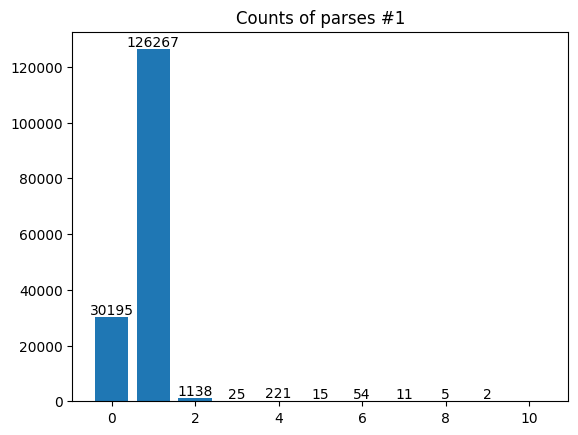

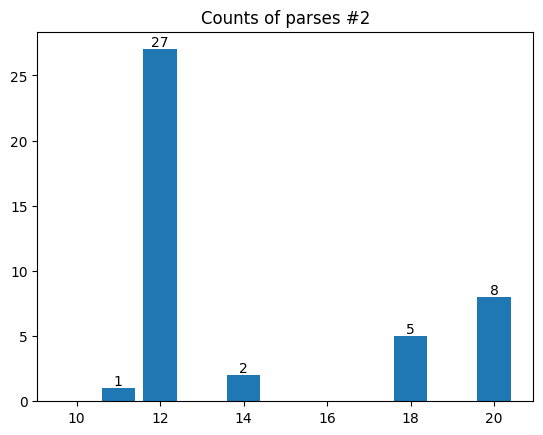

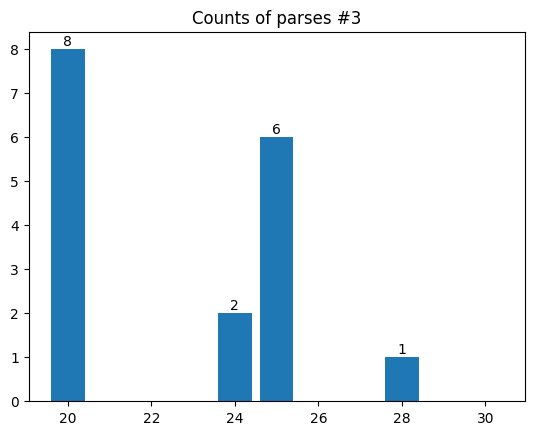

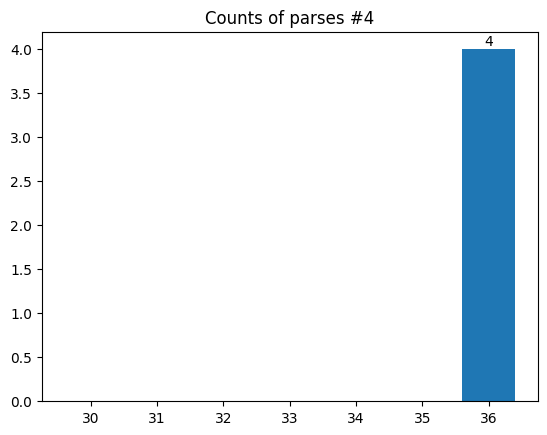

In [37]:
labels_for_hist = [0] * (max(right_parses_count.keys()) + 1)

counts_word = [0] * (max(right_parses_count.keys()) + 1)
counts_parses = [0] * (max(right_parses_count.keys()) + 1)

for i in range(max(right_parses_count.keys()) + 1):
  counts_word[i] = i
  if i in right_parses_count:
    counts_parses[i] = right_parses_count[i]
    labels_for_hist[i] = right_parses_count[i]

for i in [11, 21, 31, 41]:
  fig, ax = plt.subplots(1, 1)
  ax.bar(counts_word[i-11:i], counts_parses[i-11:i])
  ax.set_title(f'Counts of parses #{i // 10}')
  rects = ax.patches
  for rect, label in zip(rects, labels_for_hist[i-11:i]):
    height = rect.get_height()
    if label != 0:
      ax.text(rect.get_x() + rect.get_width() / 2, height + 0.01,
            label, ha='center', va='bottom')

В следующем предложении все "В-" считаются одним и тем же, поэтому некоторые разборы повторяются несколько раз

In [38]:
for sent_key in compared_parses:
  for word_key in compared_parses[sent_key]:
    if compared_parses[sent_key][word_key][0]:
      if len(compared_parses[sent_key][word_key]) > 100:
        print(sent_key)
        print(word_key, compared_parses[sent_key][word_key])
        print(len(set(compared_parses[sent_key][word_key])))

words = []
for i in sents:
  if i.sent_id == '2011Lekarstva_ot_ustalosti.xml_123':
    print(i.text)
    print()
    print(len(i.words), '- count of words in sent')
    for j in i.words:
      words.append(j.form)
print(len(compared_parses['2011Lekarstva_ot_ustalosti.xml_123'].keys()), '- count of keys in dict for this sent')
print(compared_parses['2011Lekarstva_ot_ustalosti.xml_123'].keys())

print()

print(words)
print(len(words), '- count of words in sent')
print(len(set(words)), '- count of UNIQUE words in sent')

print()

print(morph.parse('B'))
print(morph.parse('В'))

К ним относятся многие витамины, особенно тиамин - B-1, рибофлавин - В-2, никотиновая кислота - В-3 и РР, цианокобаламин - В-12, пангамовая кислота - B-15, оротовая кислота.

44 - count of words in sent
44 - count of keys in dict for this sent
dict_keys(['К', 'ним', 'относятся', 'многие', 'витамины', ',', 'особенно', 'тиамин', '-', 'B', '- n1', '1', ', n2', 'рибофлавин', '- n3', 'В', '- n4', '2', ', n5', 'никотиновая', 'кислота', '- n6', 'В n7', '- n8', '3', 'и', 'РР', ', n9', 'цианокобаламин', '- n10', 'В n11', '- n12', '12', ', n13', 'пангамовая', 'кислота n14', '- n15', 'B n16', '- n17', '15', ', n18', 'оротовая', 'кислота n19', '.'])

['К', 'ним', 'относятся', 'многие', 'витамины', ',', 'особенно', 'тиамин', '-', 'B', '-', '1', ',', 'рибофлавин', '-', 'В', '-', '2', ',', 'никотиновая', 'кислота', '-', 'В', '-', '3', 'и', 'РР', ',', 'цианокобаламин', '-', 'В', '-', '12', ',', 'пангамовая', 'кислота', '-', 'B', '-', '15', ',', 'оротовая', 'кислота', '.']
44 - count of words in sent
2

# Вероятности разбора

In [39]:
parses = []
for sent_key in compared_parses:
  for word_key in compared_parses[sent_key]:
    if compared_parses[sent_key][word_key][0]:
      parses.append(compared_parses[sent_key][word_key][1:])
score_list = []
for parse in parses:
  for p in parse:
    score_list.append(p[3])

In [40]:
labels_for_hist = [0] * len(score_list)

score_dict = dict()

for score in score_list:
  if score not in score_dict:
    score_dict[score] = 1
  else:
    score_dict[score] += 1

for i in sorted(score_dict.keys()):
  print(i, ': ', score_dict[i])

0.0 :  72
1.9e-05 :  30
5.7e-05 :  3
0.000249 :  3
0.000306 :  640
0.001499 :  2
0.0015383697987826938 :  4
0.001706 :  1
0.0026041666666666644 :  24
0.003552 :  1
0.004524 :  1
0.005037 :  1
0.00578 :  2
0.006187161639597836 :  1
0.006194307466043777 :  1
0.007104 :  1
0.007601 :  1
0.007633 :  48
0.008403361344537815 :  7
0.008426966292134833 :  1
0.008849 :  12
0.009009009009009009 :  49
0.0090702947845805 :  1
0.009174 :  1
0.009433 :  1
0.009708 :  72
0.010169 :  5
0.010657 :  1
0.0111731843575419 :  4
0.011337868480725625 :  1
0.011834319526627226 :  10
0.012137 :  3
0.013495 :  4
0.013574660633484167 :  1
0.013681592039800993 :  1
0.013683716164289985 :  2
0.015151 :  4
0.015384 :  1
0.015614010409340268 :  1
0.015625 :  7
0.016949 :  1
0.017543 :  7
0.01754385964912279 :  144
0.017857 :  1
0.018018 :  6
0.01833052131888244 :  1
0.018518 :  11
0.018796992481203003 :  2
0.019366 :  1
0.019417 :  24
0.019891500904159132 :  1
0.02008 :  1
0.020338 :  67
0.020833 :  8
0.021382751247

In [41]:
score_dict = {'01': 0,
              '02': 0,
              '03': 0,
              '04': 0,
              '05': 0,
              '06': 0,
              '07': 0,
              '08': 0,
              '09': 0,
              '1': 0}

for score in score_list:
  if 0 <= score <= 0.1:
    score_dict['01'] += 1
  elif 0.1 < score <= 0.2:
    score_dict['02'] += 1
  elif 0.2 < score <= 0.3:
    score_dict['03'] += 1
  elif 0.3 < score <= 0.4:
    score_dict['04'] += 1
  elif 0.4 < score <= 0.5:
    score_dict['05'] += 1
  elif 0.5 < score <= 0.6:
    score_dict['06'] += 1
  elif 0.6 < score <= 0.7:
    score_dict['07'] += 1
  elif 0.7 < score <= 0.8:
    score_dict['08'] += 1
  elif 0.8 < score <= 0.9:
    score_dict['09'] += 1
  elif 0.9 < score <= 1:
    score_dict['1'] += 1

for i in sorted(score_dict.keys()):
  print(i, ': ', score_dict[i])

01 :  3321
02 :  2142
03 :  2199
04 :  2719
05 :  5643
06 :  3360
07 :  4763
08 :  4161
09 :  4741
1 :  84279


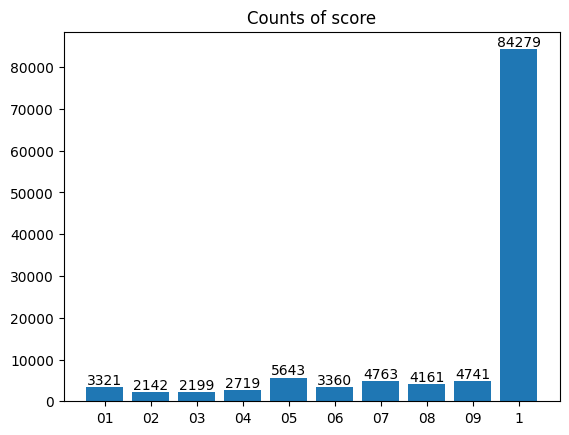

In [42]:
labels_for_hist = [0] * 10

score = [0] * 10
counts_score = [0] * 10

k = 0
for i in score_dict:
  score[k] = i
  counts_score[k] = score_dict[i]
  labels_for_hist[k] = score_dict[i]
  k += 1

fig, ax = plt.subplots(1, 1)
ax.bar(score, counts_score)
ax.set_title('Counts of score')
rects = ax.patches
for rect, label in zip(rects, labels_for_hist):
  height = rect.get_height()
  if label != 0:
    ax.text(rect.get_x() + rect.get_width() / 2, height + 0.01,
          label, ha='center', va='bottom')

Ниже, если у слова было несколько подходящих разборов, то выбирается то, у которого больше вероятность.

In [43]:
parses = []
for sent_key in compared_parses:
  for word_key in compared_parses[sent_key]:
    if compared_parses[sent_key][word_key][0]:
      parses.append(compared_parses[sent_key][word_key][1:])
max_score_list = []
for parse in parses:
  help_list = []
  for p in parse:
    help_list.append(p[3])
  max_score_list.append(max(help_list))

In [44]:
max_score_dict = {'01': 0,
                  '02': 0,
                  '03': 0,
                  '04': 0,
                  '05': 0,
                  '06': 0,
                  '07': 0,
                  '08': 0,
                  '09': 0,
                  '1': 0}

for score in max_score_list:
  if 0 <= score <= 0.1:
    max_score_dict['01'] += 1
  elif 0.1 < score <= 0.2:
    max_score_dict['02'] += 1
  elif 0.2 < score <= 0.3:
    max_score_dict['03'] += 1
  elif 0.3 < score <= 0.4:
    max_score_dict['04'] += 1
  elif 0.4 < score <= 0.5:
    max_score_dict['05'] += 1
  elif 0.5 < score <= 0.6:
    max_score_dict['06'] += 1
  elif 0.6 < score <= 0.7:
    max_score_dict['07'] += 1
  elif 0.7 < score <= 0.8:
    max_score_dict['08'] += 1
  elif 0.8 < score <= 0.9:
    max_score_dict['09'] += 1
  elif 0.9 < score <= 1:
    max_score_dict['1'] += 1

for i in sorted(max_score_dict.keys()):
  print(i, ': ', max_score_dict[i])

01 :  1161
02 :  1765
03 :  2021
04 :  2636
05 :  5455
06 :  3357
07 :  4762
08 :  4161
09 :  4736
1 :  84279


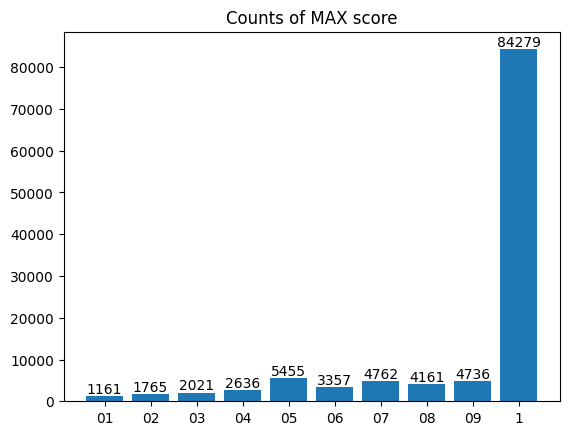

In [45]:
labels_for_hist = [0] * 10

score = [0] * 10
counts_score = [0] * 10

k = 0
for i in max_score_dict:
  score[k] = i
  counts_score[k] = max_score_dict[i]
  labels_for_hist[k] = max_score_dict[i]
  k += 1

fig, ax = plt.subplots(1, 1)
ax.bar(score, counts_score)
ax.set_title('Counts of MAX score')
rects = ax.patches
for rect, label in zip(rects, labels_for_hist):
  height = rect.get_height()
  if label != 0:
    ax.text(rect.get_x() + rect.get_width() / 2, height + 0.01,
          label, ha='center', va='bottom')